In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# 1. EDA (Exploratory Data Analysis) dan Pre-processing

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Training.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print("Info Dataset :")
print(df.info())
print("\nDeskripsi Statistik :")
print(df.describe())

Info Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2460 non-null   int64  
 1   Glucose                   2460 non-null   int64  
 2   BloodPressure             2460 non-null   int64  
 3   SkinThickness             2460 non-null   int64  
 4   Insulin                   2460 non-null   int64  
 5   BMI                       2460 non-null   float64
 6   DiabetesPedigreeFunction  2460 non-null   float64
 7   Age                       2460 non-null   int64  
 8   Outcome                   2460 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 173.1 KB
None

Deskripsi Statistik :
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2460.000000  2460.000000    2460.000000    2460.000000  2460.000000   
mean      3.817480   121.602033      6

In [10]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Tidak ada data yang missing value.

In [11]:
df.duplicated().sum()

2000

Terlihat ada 2000 data yang terdeteksi duplikat

In [12]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


Data yang terdeteksi duplikat tadi telah kita hapus. Sehingga tidak ada data yang duplikat lagi.

In [13]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


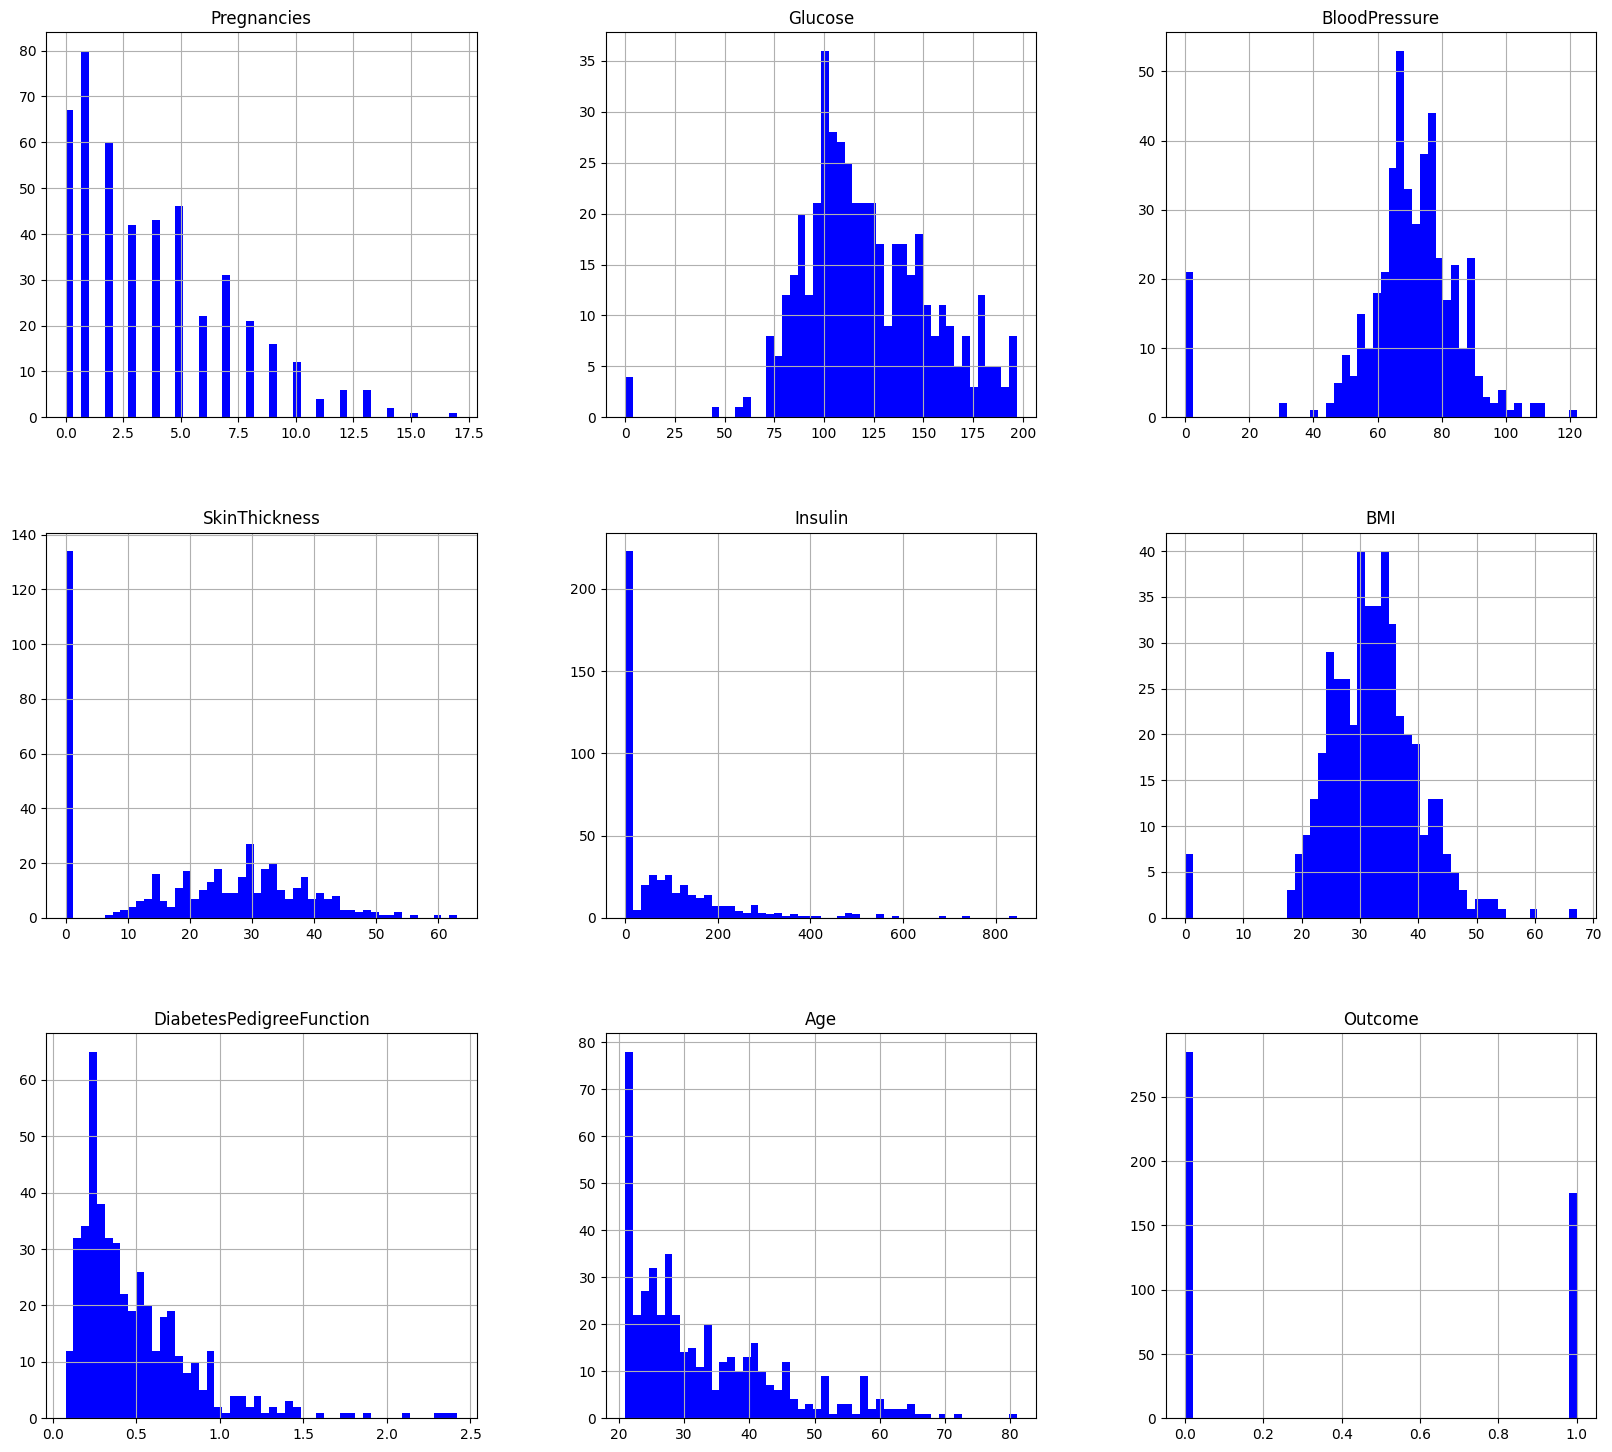

In [14]:
df.hist(bins=50, figsize=(20, 18), color='blue');

Diagram di atas menunjukkan distribusi beberapa atribut dalam dataset kesehatan. Atribut seperti Pregnancies, Glucose, dan BloodPressure memiliki pola distribusi yang menunjukkan mayoritas individu berada di rentang nilai tertentu. Misalnya, kebanyakan orang memiliki kadar glukosa sekitar 100–150 dan tekanan darah sekitar 60–80. Atribut SkinThickness dan Insulin menunjukkan banyak nilai nol, yang bisa mengindikasikan data yang hilang. Atribut BMI dan Age memiliki distribusi normal, dengan mayoritas individu memiliki BMI antara 30–40 dan usia sekitar 20–40 tahun. Histogram pada Outcome menunjukkan bahwa sebagian besar individu tidak menderita diabetes. Diagram ini berguna untuk memahami pola data, mendeteksi outlier, dan mengidentifikasi kemungkinan data yang hilang.

In [15]:
def outlier(data):
    columns = df.select_dtypes(include=['int', 'float']).columns
    outlier_counts = {}

    for x in columns:
        Q1 = data[x].quantile(0.25)
        Q3 = data[x].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = data[(data[x] < lower_bound) | (data[x] > upper_bound)]
        outlier_counts[x] = len(outliers)

    return outlier_counts

outlier_counts = outlier(df)
print(f'Jumlah data outlier : {outlier_counts}')

Jumlah data outlier : {'Pregnancies': 4, 'Glucose': 4, 'BloodPressure': 28, 'SkinThickness': 0, 'Insulin': 22, 'BMI': 14, 'DiabetesPedigreeFunction': 17, 'Age': 10, 'Outcome': 0}


Ternyata banyak data yang oulier maka kita perlu membersihkannya.

In [16]:
def remove_outlier(data):
    columns = data.select_dtypes(include=['int', 'float']).columns
    cleaned_data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

df_cleaned = remove_outlier(df)

Menghapus data yang outlier.

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375 entries, 0 to 458
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               375 non-null    int64  
 1   Glucose                   375 non-null    int64  
 2   BloodPressure             375 non-null    int64  
 3   SkinThickness             375 non-null    int64  
 4   Insulin                   375 non-null    int64  
 5   BMI                       375 non-null    float64
 6   DiabetesPedigreeFunction  375 non-null    float64
 7   Age                       375 non-null    int64  
 8   Outcome                   375 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.3 KB


Tidak ada data yang kategorikal, maka dari itu kita tidak perlu melakukan endcoding labels.

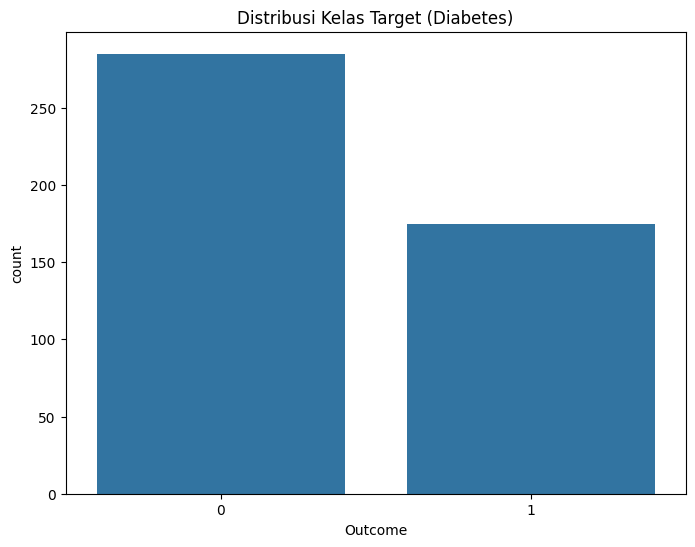

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Outcome')
plt.title('Distribusi Kelas Target (Diabetes)')
plt.show()


Melihat apakah data antara diabetes dan tidak diabetes belance atau tidak.

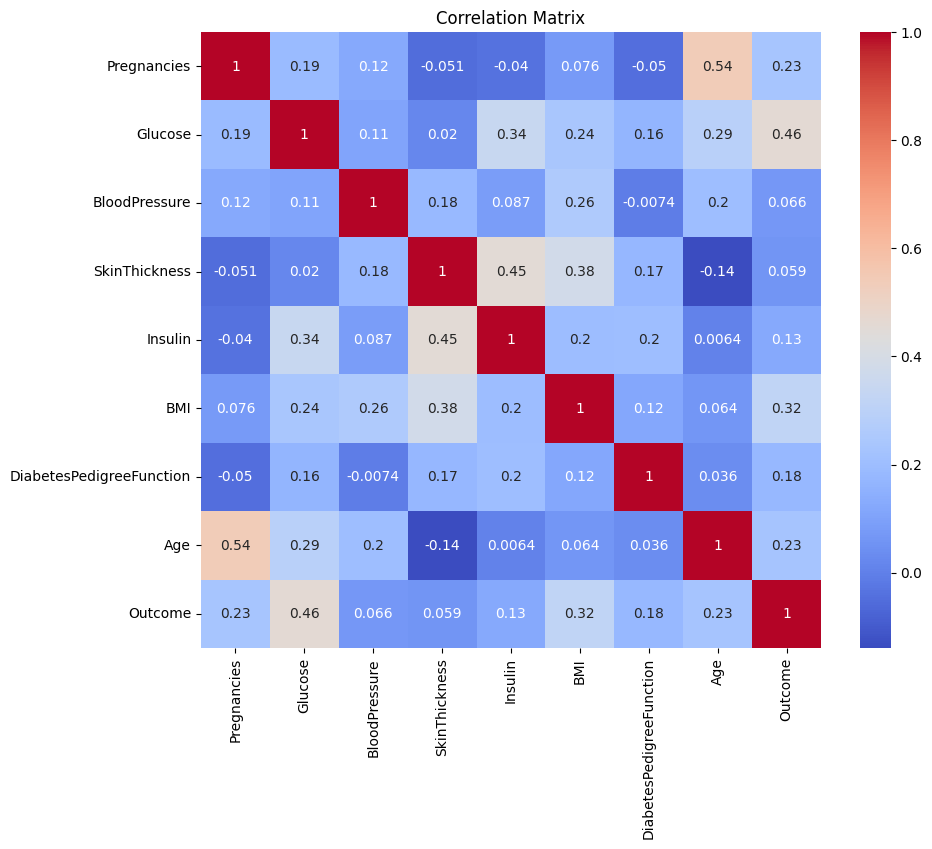

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Nilai korelasi 1 menunjukkan bahwa dua variabel memiliki hubungan positif sempurna; ketika satu variabel naik, variabel lainnya juga naik secara proporsional. Contohnya, variabel dengan dirinya sendiri selalu memiliki korelasi 1. Nilai korelasi 0 berarti tidak ada hubungan linear antara dua variabel, sehingga perubahan pada satu variabel tidak terkait langsung dengan perubahan pada variabel lainnya. Namun, bisa saja ada hubungan yang lebih kompleks. Nilai korelasi -1 menunjukkan hubungan negatif sempurna; ketika satu variabel naik, variabel lainnya turun secara proporsional. Hal ini penting dilakukan untuk mengetahui variabel mana yang saling terkait, sehingga kita dapat memahami hubungan antar variabel dalam dataset.

In [20]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


Tahap ini memisahkan kolom target atau variabel yang ingin diprediksi (dalam hal ini, Outcome) dari fitur lainnya. Kolom target dipisahkan ke dalam variabel y, sedangkan sisa fitur lainnya dimasukkan ke dalam variabel X.

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Standardisasi atau scaling adalah teknik preprocessing yang digunakan untuk mengubah rentang atau skala fitur agar model lebih stabil dan lebih cepat dalam konvergensi. StandardScaler mengubah setiap fitur agar memiliki rata-rata 0 dan standar deviasi 1.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train-Test Split adalah tahap di mana data dibagi menjadi dua set: satu untuk pelatihan model (train set) dan satu lagi untuk pengujian model (test set). Biasanya, sebagian data digunakan untuk melatih model dan sebagian lagi untuk menguji performanya.

# 2. Klasifikasi & Evaluasi

In [23]:

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)

    print(f"\nEvaluasi Model {model_name}")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"Precision : {prec:.4f}")

    print("\nConfusion Matrix :")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return acc, rec, prec

Fungsi evaluate_model digunakan untuk mengevaluasi kinerja model klasifikasi. Fungsi ini menghitung metrik seperti akurasi, recall, dan precision, yang menunjukkan seberapa baik model dalam memprediksi data dengan benar, mengenali kasus positif, dan menghindari prediksi positif yang salah.  Fungsi ini menerima dua parameter utama, yaitu nilai sebenarnya (y_true) dan prediksi model (y_pred), serta nama model untuk identifikasi. Pertama, fungsi ini menghitung akurasi yang menunjukkan seberapa banyak prediksi yang benar dibandingkan total prediksi, recall yang mengukur seberapa banyak positif sebenarnya yang berhasil dikenali, dan precision yang menunjukkan seberapa banyak prediksi positif yang benar-benar positif. Selain itu, fungsi ini juga menampilkan confusion matrix untuk melihat lebih jelas kesalahan model, seperti false positives dan false negatives, dalam bentuk heatmap. Hasil evaluasi ini membantu kita memahami performa model dan membuat perbandingan antara model yang berbeda.



> KNN




Evaluasi Model KNN
Accuracy  : 0.7500
Recall    : 0.4872
Precision : 0.8636

Confusion Matrix :


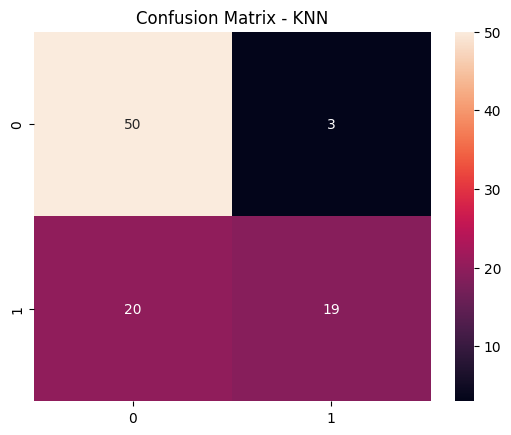

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
metrics_knn = evaluate_model(y_test, y_pred_knn, "KNN")



> Decision Tree Classifier




Evaluasi Model Decision Tree
Accuracy  : 0.6848
Recall    : 0.5385
Precision : 0.6562

Confusion Matrix :


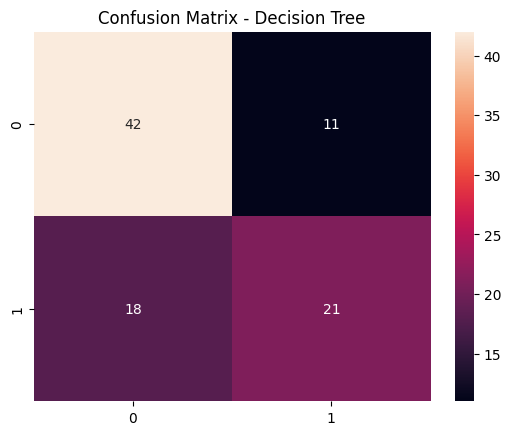

In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
metrics_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")




> Naive Bayes



Evaluasi Model Naive Bayes
Accuracy  : 0.8043
Recall    : 0.6410
Precision : 0.8621

Confusion Matrix :


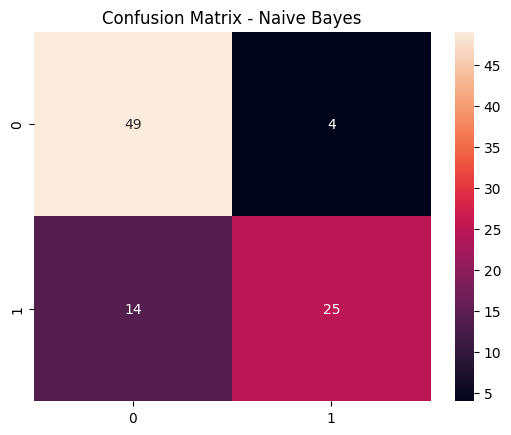

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
metrics_nb = evaluate_model(y_test, y_pred_nb, "Naive Bayes")



> Perbandingan metode



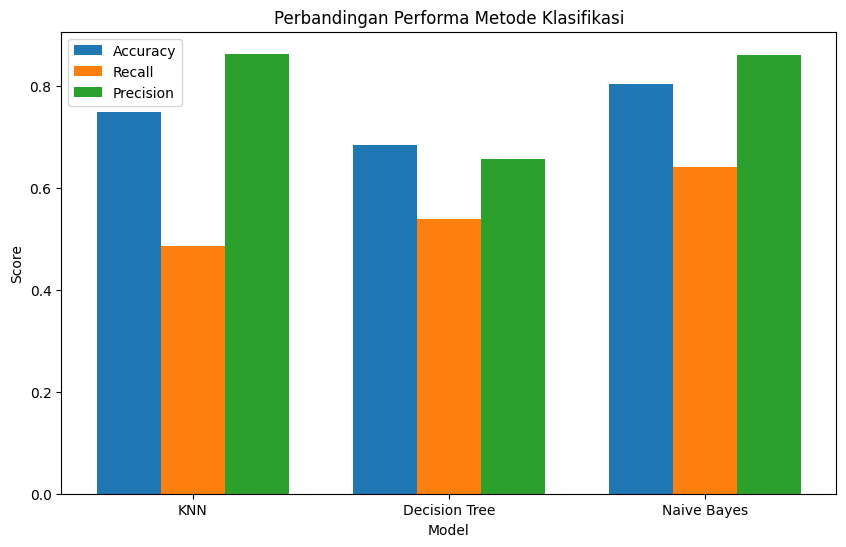

In [27]:
models = ['KNN', 'Decision Tree', 'Naive Bayes']
metrics = np.array([metrics_knn, metrics_dt, metrics_nb])

plt.figure(figsize=(10,6))
x = np.arange(len(models))
width = 0.25

plt.bar(x - width, metrics[:,0], width, label='Accuracy')
plt.bar(x, metrics[:,1], width, label='Recall')
plt.bar(x + width, metrics[:,2], width, label='Precision')

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Perbandingan Performa Metode Klasifikasi')
plt.xticks(x, models)
plt.legend()
plt.show()

In [28]:
best_acc_idx = np.argmax(metrics[:,0])
best_rec_idx = np.argmax(metrics[:,1])
best_prec_idx = np.argmax(metrics[:,2])

print("\n<<<<< KESIMPULAN >>>>>")
print(f"Metode Dengan Accuracy Terbaik  : {models[best_acc_idx]}")
print(f"Metode Dengan Recall Terbaik    : {models[best_rec_idx]}")
print(f"Metode Dengan Precision Terbaik : {models[best_prec_idx]}")



<<<<< KESIMPULAN >>>>>
Metode Dengan Accuracy Terbaik  : Naive Bayes
Metode Dengan Recall Terbaik    : Naive Bayes
Metode Dengan Precision Terbaik : KNN
